# Notebook 3: Investigate Strain-Specific Capabilities

In this notebook, we showcase some simple applications of strain-specific models including growth simulation on different media. This notebook utilize the draft models created from Notebook 2. Note that the models constructed and used here could undergo further manual curation to increase their quality and content.

In [3]:
import cobra
import pandas as pd
import seaborn as sns
from cobra.io import load_json_model
from glob import glob

In [4]:
#load the draft models created from Notebook2
model_files=glob('%s/*.json'%'Models')
model_files

['Models/CP000946.1.json',
 'Models/CU651637.1.json',
 'Models/CU928164.2.json',
 'Models/CP002167.1.json',
 'Models/CU928163.2.json']

## Begin Constraint-Based Modeling on Group of Strain-Specific Models

In [5]:
#Establish a definition that initializes models to an in silico representation of M9 media

def m9(model):
    for reaction in model.reactions:
        if 'EX_' in  reaction.id:
            reaction.lower_bound=0 
            
    model.reactions.EX_ca2_e.lower_bound=-1000
    model.reactions.EX_cl_e.lower_bound=-1000
    model.reactions.EX_co2_e.lower_bound=-1000
    model.reactions.EX_cobalt2_e.lower_bound=-1000
    model.reactions.EX_cu2_e.lower_bound=-1000
    model.reactions.EX_fe2_e.lower_bound=-1000
    model.reactions.EX_fe3_e.lower_bound=-1000
    model.reactions.EX_h_e.lower_bound=-1000
    model.reactions.EX_h2o_e.lower_bound=-1000
    model.reactions.EX_k_e.lower_bound=-1000
    model.reactions.EX_mg2_e.lower_bound=-1000
    model.reactions.EX_mn2_e.lower_bound=-1000
    model.reactions.EX_mobd_e.lower_bound=-1000
    model.reactions.EX_na1_e.lower_bound=-1000
    model.reactions.EX_tungs_e.lower_bound=-1000
    model.reactions.EX_zn2_e.lower_bound=-1000
    model.reactions.EX_ni2_e.lower_bound=-1000
    model.reactions.EX_sel_e.lower_bound=-1000
    model.reactions.EX_slnt_e.lower_bound=-1000
    model.reactions.EX_glc__D_e.lower_bound=-20
    model.reactions.EX_so4_e.lower_bound=-1000
    model.reactions.EX_nh4_e.lower_bound=-1000
    model.reactions.EX_pi_e.lower_bound=-1000
    model.reactions.EX_cbl1_e.lower_bound=-.01
    model.reactions.EX_o2_e.lower_bound=-20
       
    return model

In [6]:
#Load each target Strain model, initialize it to glucose M9 media and see if the model can optimize for
# biomass production

for model in model_files:
    mod=cobra.io.load_json_model(model)
    m9(mod)
    print (mod.id, mod.optimize().f)

CP000946.1 1.1207961081933524
CU651637.1 1.1207855410255514
CU928164.2 1.1207855410255527
CP002167.1 1.1207855410255525
CU928163.2 1.1207961081933542


In [7]:
#In this Tutorial we see that all of the target-strain models are immediately able to solve in the defined medium
#This will not always be the case and gap-filling and identification of auxotrophies may be necessary 
#(see original protocol)

## Example of examining strain-specific capabilities: carbon source utilization

In this example, we examine the draft models abilities to simulate growth on different carbon sources. The carbon sources are limited to those with exchange reactions in the model 


In [8]:
# load the reference model and extract the list of carbon source to test 

model = load_json_model('iML1515.json')

StrainsOfInterest=pd.read_excel('Strain Information.xlsx')
targetStrainIDs=list(StrainsOfInterest['NCBI ID'])

listPotCarbonSources=[]
for r in model.reactions:
    if 'EX_' in r.id:
        for m in r.metabolites:
            if 'C' in m.formula:
                listPotCarbonSources.append(r.id)

In [9]:
#create a dataframe to store the simulation result on list of carbon source
growthCapabilities=pd.DataFrame(index=listPotCarbonSources,columns=targetStrainIDs)

In [10]:
#iterature through all the models to simulate growth on different carbon sources
# to do so, we closed the default carbon source glucos by setting the lower bound of its exchange reaction to 0. 
# and open the exchange reaction of the carbon source of interest to enable nutrient update

for model in model_files:
    mod=cobra.io.load_json_model(model)
    listCapabilities=[]
    
    for source in listPotCarbonSources:
        m9(mod)
        mod.reactions.EX_glc__D_e.lower_bound=0
        mod.reactions.get_by_id(source).lower_bound=-1000
        listCapabilities.append(mod.optimize().f)
        
    for col in growthCapabilities.columns:
        if col in model:
            growthCapabilities[col]=listCapabilities

cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver sta

cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver sta

cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver sta

cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver sta

cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver sta

cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver status is 'infeasible'
cobra/util/solver.py:408 UserWarning: solver sta

In [11]:
growthCapabilities

CP000946.1  CU651637.1  CP002167.1  CU928163.2  CU928164.2
EX_acgam_e         12.842831   12.842748   12.842748   12.842831   12.842748
EX_cellb_e         11.878912   11.878870   11.878870   11.878912   11.878870
EX_chol_e           0.000000    0.221636    0.221636    0.000000    0.000000
EX_ade_e            0.496634    0.496627    0.496627    0.496634    0.281315
EX_4abut_e          0.562435    0.562428    0.562428    0.562435    0.562428
EX_ac_e             0.428358    0.428352    0.428352    0.428358    0.428352
EX_akg_e            8.364325    8.364251    8.364251    8.364325    8.364251
EX_ala__L_e         2.899720    2.899686    2.899686    2.899720    2.899686
EX_arg__L_e         2.798891    2.798856    2.798856    2.601610    2.798856
EX_asp__L_e         9.704300    9.704202    9.704202    9.704300    9.704202
EX_cytd_e          19.192908   19.192791   19.192791   19.192908   19.192791
EX_dcyt_e          18.878871   18.878697   18.878697   18.878871   18.878697
EX_fum_e            9.704300    9.704202    9.704202    9.704300    9.704202
EX_glu__L_e         7.951270    7.951201    7.951201    7.951270    7.951201
EX_gua_e            1.396844    1.396771    1.396771    1.396844    0.934816
EX_met__L_e         0.000000    0.000000    0.000000    0.000000    0.000000
EX_metsox_S__L_e    0.000000    0.000000    0.000000    0.000000    0.000000
EX_crn_e            0.000000    0.000000    0.000000    0.000000    0.000000
EX_glcn_e          16.301036   16.300949   16.300949   16.301036   16.300949
EX_gln__L_e         5.138213    5.138151    5.138151    5.138213    5.138151
EX_glyc_e           7.683620    7.683557    7.683557    7.683620    7.683557
EX_man_e           11.878912   11.878870   11.878870   11.878912   11.878870
EX_rib__D_e         5.746865    5.746832    5.746832    5.746865    5.746832
EX_sbt__D_e         9.614060    9.614019    9.614019    9.614060    9.614019
EX_ura_e            0.000000    0.000000    0.000000    0.000000    0.000000
EX_val__L_e         0.000000    0.000000    0.000000    0.000000    0.000000
EX_xan_e            0.481995    0.481989    0.481989    0.481995    0.256790
EX_co2_e           -0.043467   -0.043463   -0.043463   -0.043467   -0.043730
EX_hxan_e           0.494887    0.494880    0.494880    0.494887    0.280753
EX_ile__L_e        -0.043467   -0.043463   -0.043463   -0.043467   -0.043730
...                      ...         ...         ...         ...         ...
EX_urate_e          0.393785    0.393779    0.393779    0.393785    0.208581
EX_cpgn_un_e       -0.043467   -0.043463   -0.043463   -0.043467   -0.043730
EX_tartr__D_e      10.041344   10.041214   10.041214   10.041344   10.041214
EX_crn__D_e         0.000000    0.000000    0.000000    0.000000    0.000000
EX_psclys_e        10.165027    0.000000    0.000000    0.000000    0.000000
EX_galctn__L_e     16.005483    0.000000    0.000000   16.005483    0.000000
EX_5dglcn_e         0.000000   18.987283   18.987283   18.987322   18.987283
EX_ppal_e           0.428358    0.428352    0.428352    0.428358    0.428352
EX_LalaDglu_e       6.970883    6.970794    6.970794    6.970883    6.970794
EX_LalaLglu_e       6.970883    6.970794    6.970794    6.970883    6.970794
EX_ttrcyc_e         0.000000   -0.043463    0.000000    0.000000    0.000000
EX_mincyc_e         0.000000   -0.043463    0.000000    0.000000    0.000000
EX_doxrbcn_e        0.000000   -0.043463    0.000000    0.000000    0.000000
EX_fusa_e           0.000000   -0.043463    0.000000    0.000000    0.000000
EX_cm_e             0.000000   -0.043463    0.000000    0.000000    0.000000
EX_novbcn_e         0.000000   -0.043463    0.000000    0.000000    0.000000
EX_rfamp_e          0.000000   -0.043463    0.000000    0.000000    0.000000
EX_quin_e           0.000000   -0.043463    0.000000    0.000000    0.000000
EX_3hpp_e           0.000000   -0.043463    0.000000    0.000000    0.000000
EX_5mtr_e           0.000000   -0.043463    0.000000    0.000000    0.000000
EX_arbt_e     

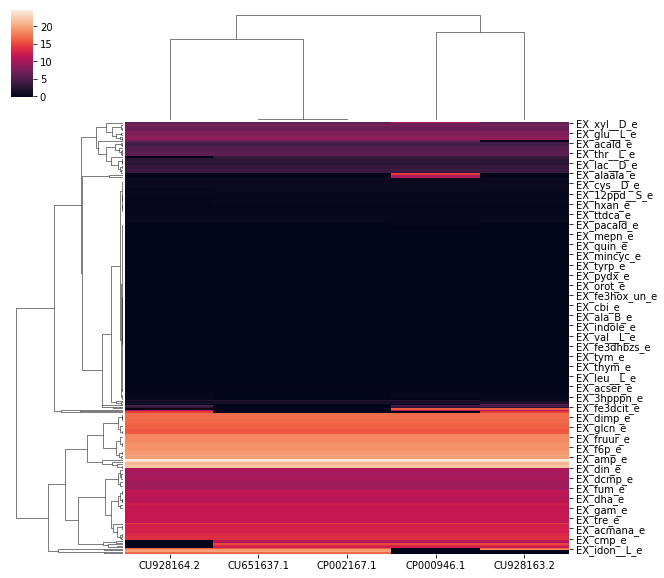

In [12]:
#use heatmap to visualize the difference in growth simulation on carbon sources
##Already differences in growth capabilities are apparent between just these 5 strains
sns.clustermap(growthCapabilities)

## Example of gap-filling a model through a custom gap-filling implementation defined below

In this example, we examine the draft model of CP000946.1 and it's inability to grow using EX_metglcur_e as a carbon source as this is readily apparent and different from the other draft models from the proceeding analysis

In [ ]:
#Gather the list of base strain genes that have no homolog in strain of interest, an input to the below function
hom_matrix=pd.read_csv('ortho_matrix.csv')
hom_matrix=hom_matrix.set_index('Unnamed: 0')
strain=hom_matrix['CP000946.1']
missingGenes=list(strain[strain==0.0].index)

In [ ]:
def gapfill_multi(model, missing_genes, **kwargs):
    """
    Generate a list of gapfilling reactions from a list of missing genes for a strain-specific model.
    
    :param model: COBRA model for the base strain with the objective coefficient for the reaction of interest (e.g. biomass reaction) set to 1.
    
    :param missing_genes: list of genes with no homologs in the strain of interest.
    
    :param lower_bound: minimum allowable yield of gapfilled model.
    
    :param biomass: override the current model settings and temporarily assign the objective coefficient for a function of interest to 1.
    
    :return: a list of gapfilling reactions.
    
    """
    
    if 'lower_bound' in kwargs.keys():
        lower_bound = kwargs['lower_bound']
    else:
        lower_bound = model.optimize().objective_value*0.5
        
    biomass_reactions = [rx.id for rx in model.reactions if rx.objective_coefficient == 1]
    if 'biomass' in kwargs.keys():
        biomass = kwargs['biomass']
        if len(biomass_reactions) > 1:
            for rx in set(biomass_reactions) - {biomass}:
                model.reactions.get_by_id(rx).objective_coefficient = 0
                 
    else:
        if len(biomass_reactions) > 1:
            raise Exception("This model has more than one objective. \n Please adjust the objective coefficient to 1 for the chosen objective reaction (e.g. biomass or ATP) and 0 for the rest of the reactions, \n or specify the reaction ID to use as an objective.")
        if len(biomass_reactions) > 1:
            raise Exception("The model doesn't have an objective function. Please set the appropriate objective coefficient to 1, or specify the reaction ID to use as an objective.")
        biomass = biomass_reactions[0]
        
        
    model.solver.configuration.tolerances.feasibility = 1e-9
    constraints = []
    indicators = []

    for rx in cobra.manipulation.find_gene_knockout_reactions(model, missing_genes):

        indicator = model.problem.Variable('%s_i'%rx.id , type = 'binary')
        indicators.append(indicator)

        new_cstr1 = model.problem.Constraint( rx.flux_expression - rx.upper_bound*indicator ,ub = 0)
        new_cstr2 = model.problem.Constraint(-rx.flux_expression + rx.lower_bound*indicator ,ub = 0)
        constraints += [new_cstr1, new_cstr2]
        model.add_cons_vars([new_cstr1, new_cstr2, indicator])

    model.reactions.get_by_id(biomass).lower_bound = lower_bound
    model.objective = model.problem.Objective(-sum(indicators))
    sol = model.optimize()
    indicator_results = [ind.name[:-2] for ind in indicators if ind.primal != 0.0]
    
    # removing changes to model
    model.remove_cons_vars(constraints+indicators)
    for rx in set(biomass_reactions):
        model.reactions.get_by_id(rx).objective_coefficient = 1   
        
    return indicator_results

In [ ]:
# We see that in this condition the model cannot synthesize biomass in this condition as per 
# above analysis
model=cobra.io.load_json_model('Models/CP000946.1.json')
m9(model)
model.reactions.EX_glc__D_e.lower_bound=0
model.reactions.EX_metglcur_e.lower_bound=-1000
model.optimize()

In [ ]:
# We see that however the base model can synthesize biomass in this condition
base=cobra.io.load_json_model('iML1515.json')
m9(base)
base.reactions.EX_glc__D_e.lower_bound=0
base.reactions.EX_metglcur_e.lower_bound=-1000
base.optimize()

In [ ]:
#By runnning the above function we obtain the list of candidate reactions
gapfill_multi(base, missingGenes)

In [ ]:
base.reactions.METGLCURt2pp.genes

In [ ]:
#Upon further inspection we see that the lack of a homolog in the b1616 gene is what causes the CP000946.1 strain
#to lose this functionality
'b1616' in missingGenes